# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Exploration

In [3]:
df = pd.read_csv("Downloads/fake reviews dataset.csv")
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [6]:
df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

In [7]:
df.rename(columns = {'text_':'text'},inplace = True)

In [8]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [9]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [10]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [11]:
df['category'].nunique()

10

Label column will be the target . It has two categories [OG & OR ] so binary classification will be performed.

## EDA

In [11]:
# calculate the class distribution of target column

label_count = df['label'].value_counts()
label_count

CG    20216
OR    20216
Name: label, dtype: int64

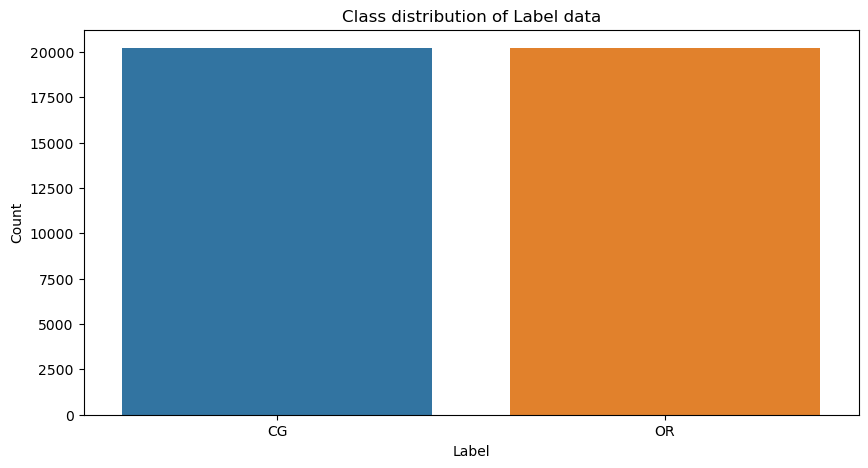

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(data = df , x = label_count.index , y = label_count.values)
plt.title("Class distribution of Label data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

The data is equally distributed with value count of 20216 for each OG and OR 

In [13]:
#distribution of rating 
rating_count = df['rating'].value_counts()
rating_count

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

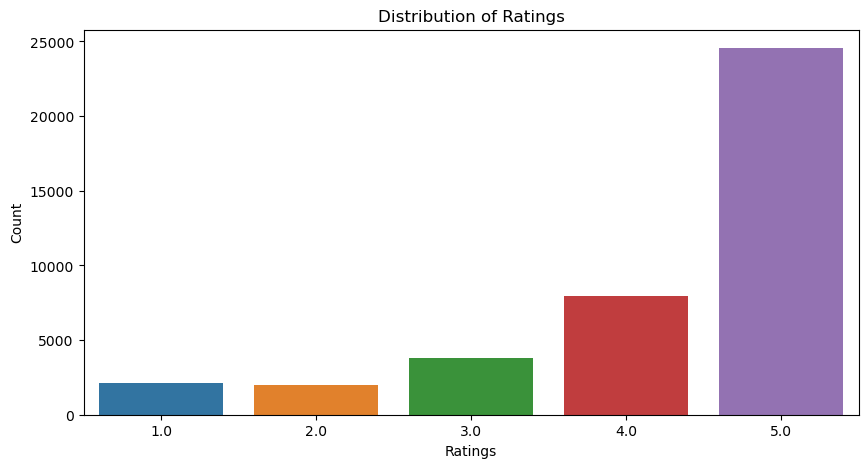

In [14]:
plt.figure(figsize =(10,5))
sns.barplot(data = df , x = rating_count.index , y = rating_count.values)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

Most of the products has 5 star ratings . 

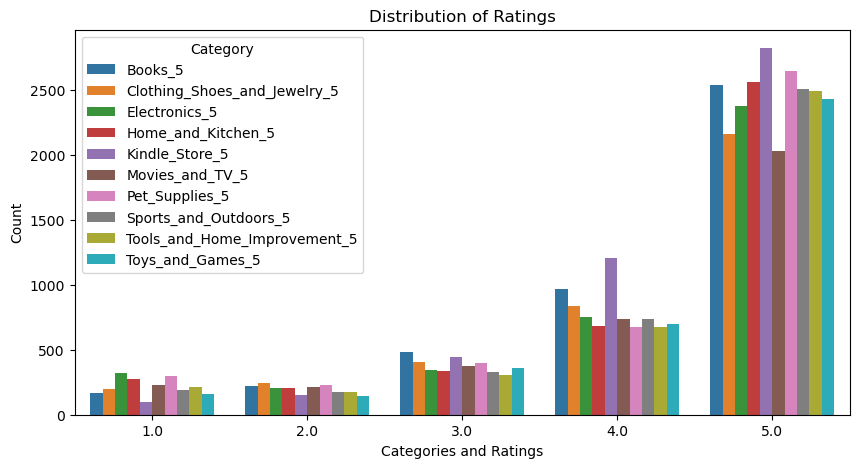

In [15]:
# Group by ratings and category
grouped_data = df.groupby(['rating', 'category']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_data, x='rating', y='count', hue='category')
plt.title("Distribution of Ratings")
plt.xlabel("Categories and Ratings")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

In the distribution of 5 star Ratings , Kindle store products has the highest ratings then Pet supplies etc.

## Data Preprocessing

Data Preprocessing in classification model includes Data Cleaning , Tokenization , Stemming or Lematization , Stop-word Removal 

### Data cleaning

In [12]:
# converting data in Text column to lower case

df['text'] = df['text'].str.lower()

In [13]:
#Removing Special Characters and Numbers: Removing non-alphabetic characters, numbers, and punctuation marks.

import re #re stands for Regular Expression -- used for matching , searching and manipulating text

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [14]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...


In [15]:
#Removing extra Whitespaces 
df['text'] = df['text'].str.strip()

### Tokenization

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
df['tokens'] = df['text'].apply(word_tokenize)

In [18]:
df.head()

,category,rating,label,text,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"[love, this, well, made, sturdy, and, very, co..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"[love, it, a, great, upgrade, from, the, origi..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"[this, pillow, saved, my, back, i, love, the, ..."
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"[missing, information, on, how, to, use, it, b..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"[very, nice, set, good, quality, we, have, had..."


### Stop-word Removal

In [19]:
#Using libraries like NLTK for pre-defined stopwords list

from nltk.corpus import stopwords

In [20]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words] )

### Stemming or Lematization

In [21]:
import nltk

In [22]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [25]:
df.head()

,category,rating,label,text,tokens
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"[love, well, made, sturdy, comfortable, love, ..."
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"[love, great, upgrade, original, ive, mine, co..."
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"[pillow, saved, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"[missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"[nice, set, good, quality, set, two, month]"


In [26]:
# Join tokens into a single string
df['joined_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,category,rating,label,text,tokens,joined_text
0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"[love, well, made, sturdy, comfortable, love, ...",love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"[love, great, upgrade, original, ive, mine, co...",love great upgrade original ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"[pillow, saved, back, love, look, feel, pillow]",pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"[missing, information, use, great, product, pr...",missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"[nice, set, good, quality, set, two, month]",nice set good quality set two month


In [31]:
df.to_csv("Downloads\cleaned_review_data.csv")

### Feature Extraction

In [27]:
#TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words by importance relative to the entire corpus.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Limit features to top 5000 words
X = tfidf.fit_transform(df['joined_text']).toarray()

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit_transform(df['label'])

array([0, 0, 0, ..., 1, 0, 1])

In [30]:
y = df['label']

## Split the Dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Deep Learning

## Importing libraries

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

AttributeError: module 'inspect' has no attribute 'ArgSpec'

## Tokenization and Padding

In [35]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(df['text'])

In [46]:
#Deep learning models require sequences instead of raw text.
X = tokenizer.texts_to_sequences(df['text'])

X = pad_sequences(X , maxlen = 200)
y = df['label']

In [47]:
# Train test split

X_train, X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 42 , stratify = y)

## Building a Deep Learning Model

### Simple LSTM model

In [53]:
# Build an LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\adith\.conda\include\New folder\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [54]:
history = model.fit(
    X_train, y_train,
    epochs=10,  # Increase epochs for better performance
    batch_size=64,
    validation_split=0.2,  # Use part of the training set for validation
    verbose=1
)

Epoch 1/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 305s 730ms/step - accuracy: 0.7944 - loss: 0.4068 - val_accuracy: 0.9161 - val_loss: 0.2113
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 337s 833ms/step - accuracy: 0.9301 - loss: 0.1886 - val_accuracy: 0.9351 - val_loss: 0.1693
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 402s 882ms/step - accuracy: 0.9611 - loss: 0.1109 - val_accuracy: 0.9377 - val_loss: 0.1783
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 338s 834ms/step - accuracy: 0.9636 - loss: 0.0979 - val_accuracy: 0.9394 - val_loss: 0.1731
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 4794s 12s/step - accuracy: 0.9780 - loss: 0.0662 - val_accuracy: 0.9297 - val_loss: 0.2165
Epoch 6/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 6159s 15s/step - accuracy: 0.9773 - loss: 0.0669 - val_accuracy: 0.9349 - val_loss: 0.2080
Epoch 7/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 661s 1s/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9328 - val_loss: 0.2373
Epoch 8/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.9850 - loss: 0

In [50]:
# Check data types of X_train and y_train
print(X_train.dtype)
print(y_train.dtype)

int32
object


In [51]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [52]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (32345, 200)
y_train shape: (32345,)


## Evaluate the model

In [56]:
# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Accuracy in percentage

# Generate Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


253/253 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.9342 - loss: 0.3119
Test Loss: 0.2934368848800659
Test Accuracy: 93.55%
253/253 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4044
           1       0.94      0.93      0.94      4043

    accuracy                           0.94      8087
   macro avg       0.94      0.94      0.94      8087
weighted avg       0.94      0.94      0.94      8087



The accuracy from deep learning LSTM model is 93.55%

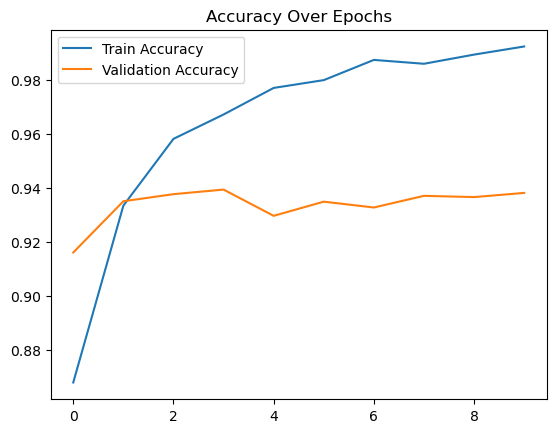

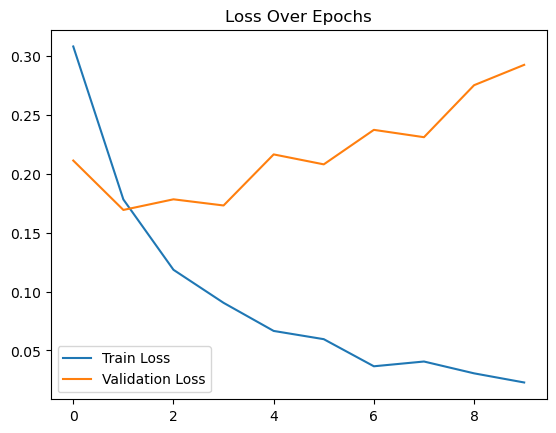

In [57]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()
